<div style="position: relative; width: 100%; height: 100vh; padding: 50px; box-sizing: border-box;">
    <!-- Logo positioned in the right corner -->
    <img src="logo.png" style="position: absolute; top: 10px; right: 10px; width: 100px;"/>

   <!-- Proprietary Content -->
   <div style="position: absolute; bottom: px5; left: 5%; transform: translateX(-50%); color: grey; text-align: left;font-style: italic">
   <p>Proprietary content. © 10xTechClub. All Rights Reserved. Unauthorized use or distribution prohibited.</p>
   </div>
</div>

# <div style="text-align: center; font-size: 45px; color: purple;"><b>Freehand Drawing with Hand Tracking ✍️</b></div>

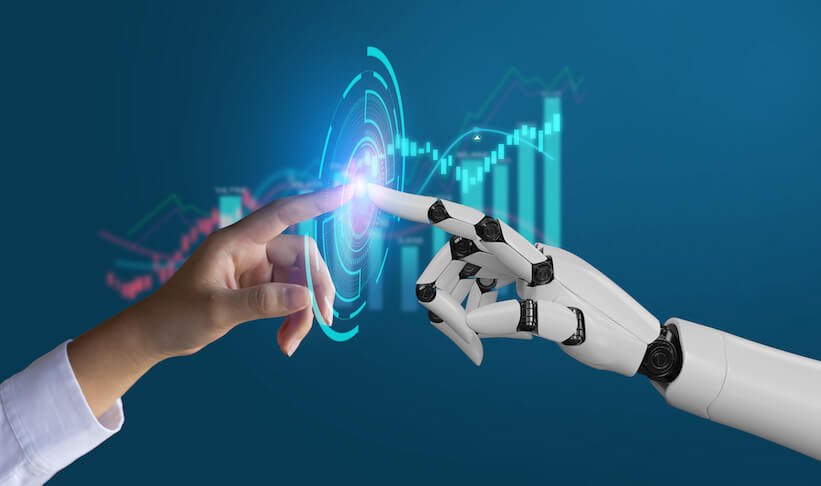

# 🖐️ **Drawing with Hands**

### **📝 Problem Statement**
What if you could draw pictures in the air with your hands? In this project, you’ll use hand tracking to create a drawing application that lets you draw by moving your fingers.

### **🔧 What Are We Going to Use?**
- **OpenCV**: To handle the video feed and display the drawing.
- **MediaPipe**: To detect finger positions.
- **Python**: To implement the drawing logic.

### **🌍 Real-World Applications**
- **Art Therapy**: Allows patients to express creativity without traditional tools.
- **Interactive Learning**: Helps students engage with art in a fun way.

### **🖥️ Key Code Concepts**
- **Mouse Events**: Simulate mouse clicks and movements based on hand positions.
- **Canvas Drawing**: Draw on a canvas using the coordinates of finger movements.


## <div style="color: red;"><b>Import Libraries</b></div>


In [1]:
## Note- Press S to start and e to stop

In [2]:
import cv2
import mediapipe as mp
import time


### <div style="color: black;">**What’s Happening Here? 🤔**</div>

### **cv2**: 
This library helps us work with images and videos.

### **mediapipe**: 
This library helps us with hand tracking in real-time.

### **time**: 
This library helps us manage timing and delays.


<div style="color: red;"><b>Initialize MediaPipe Components</b></div>

In [3]:
# Initialize MediaPipe components
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils


### <div style="color: black;">**What’s Happening Here? 🛠️**</div>

### **mp_hands**: 
Helps detect and track hands.

### **mp_drawing**: 
Helps draw on the images, such as showing hand landmarks.


<div style="color: red;"><b>Define Drawing Specifications</b></div>

In [4]:
# Define drawing specifications
drawing_spec_landmarks = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)  # Green dots
drawing_spec_connections = mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2)  # Red lines


### <div style="color: black;">**What’s Happening Here? 🎨**</div>

### **drawing_spec_landmarks**: 
Settings for drawing green dots on hand landmarks.

### **drawing_spec_connections**: 
Settings for drawing red lines connecting hand landmarks.


<div style="color: red;"><b>Initialize Webcam</b></div>

In [5]:
# Initialize webcam
cap = cv2.VideoCapture(0)


### <div style="color: black;">**What’s Happening Here? 📹**</div>

### **cap**: 
Opens the webcam to capture video.


<div style="color: red;"><b>Define Freehand Drawing Function</b></div>

In [6]:
# Initialize list to store points for drawing
points = []
drawing_active = False
last_point_time = time.time()

def draw_freehand(image, points):
    """Draw lines between all points."""
    if len(points) > 1:
        for i in range(len(points) - 1):
            cv2.line(image, points[i], points[i+1], (0, 0, 255), 5)  # Red lines, thickness 5


# **What’s Happening Here? 🖊️**

## **cv2:**
This is a library that helps us work with images and videos.

## **Variables:**

- **points:** A list to keep track of points where the user draws.
- **drawing_active:** A flag to determine if drawing is currently active.
- **last_point_time:** Keeps track of the time when the last point was added.
- **draw_freehand:** A function that draws lines between the points where the user has drawn.




<div style="color: red;"><b>Initialize the Hands Model</b></div>

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='google.protobuf.symbol_database')

# Your hand tracking code here...
# Initialize the hands model
with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Flip the image horizontally to mirror the webcam feed
        frame = cv2.flip(frame, 1)
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = hands.process(image)
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Track finger tip or palm position
                tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
                
                # Convert to pixel coordinates
                h, w, _ = image.shape
                tip_px = (int(tip.x * w), int(tip.y * h))
                
                # Debug: Draw a circle at the tip position
                cv2.circle(image, tip_px, 5, (255, 0, 0), -1)  # Blue circle for debugging
                
                # Add point to list if drawing is active
                if drawing_active:
                    current_time = time.time()
                    if current_time - last_point_time > 0.1:  # Adjust the delay here (0.1 seconds)
                        points.append(tip_px)
                        if len(points) > 500:  # Limit the number of points to manage memory
                            points.pop(0)
                        last_point_time = current_time
                
                # Draw freehand if drawing is active
                if drawing_active:
                    draw_freehand(image, points)
                
                # Optionally, draw landmarks and connections
                mp_drawing.draw_landmarks(
                    image, 
                    hand_landmarks, 
                    connections=mp_hands.HAND_CONNECTIONS,  
                    landmark_drawing_spec=drawing_spec_landmarks,
                    connection_drawing_spec=drawing_spec_connections
                )
        
        # Check if the user wants to start a new drawing segment
        if cv2.waitKey(1) & 0xFF == ord('s'):
            # Start a new drawing segment
            drawing_active = True
            points = []
        
        # Check if the user wants to stop the current drawing segment
        if cv2.waitKey(1) & 0xFF == ord('e'):
            # End the current drawing segment
            drawing_active = False
        
        # Display the frame
        cv2.imshow('Freehand Drawing', image)



# **What’s Happening Here? 🔄**

## **Key Code Explanations:**

- **while cap.isOpened():** Keeps the webcam feed running.
  
- **frame = cv2.flip(frame, 1):** Flips the image to create a mirror effect.

- **image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB):** Converts the image to RGB for hand detection.

- **results = hands.process(image):** Detects hands in the image.

- **image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR):** Converts the image back to BGR for displaying.


<div style="color: red;"><b>Track and Draw Points</b></div>


In [ ]:
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Track finger tip or palm position
                tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
                
                # Convert to pixel coordinates
                h, w, _ = image.shape
                tip_px = (int(tip.x * w), int(tip.y * h))
                
                # Debug: Draw a circle at the tip position
                cv2.circle(image, tip_px, 5, (255, 0, 0), -1)  # Blue circle for debugging
                
                # Add point to list if drawing is active
                if drawing_active:
                    current_time = time.time()
                    if current_time - last_point_time > 0.1:  # Adjust the delay here (0.1 seconds)
                        points.append(tip_px)
                        if len(points) > 500:  # Limit the number of points to manage memory
                            points.pop(0)
                        last_point_time = current_time
                
                # Draw freehand if drawing is active
                if drawing_active:
                    draw_freehand(image, points)
                
                # Optionally, draw landmarks and connections
                mp_drawing.draw_landmarks(
                    image, 
                    hand_landmarks, 
                    connections=mp_hands.HAND_CONNECTIONS,  
                    landmark_drawing_spec=drawing_spec_landmarks,
                    connection_drawing_spec=drawing_spec_connections
                )
        
        # Check if the user wants to start a new drawing segment
        if cv2.waitKey(1) & 0xFF == ord('s'):
            # Start a new drawing segment
            drawing_active = True
            points = []
        
        # Check if the user wants to stop the current drawing segment
        if cv2.waitKey(1) & 0xFF == ord('e'):
            # End the current drawing segment
            drawing_active = False
        
        # Display the frame
        cv2.imshow('Freehand Drawing', image)


# **What’s Happening Here? ✍️**

## **Key Code Explanations:**

- **if results.multi_hand_landmarks:** Checks if hands are detected in the image.

- **tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]:** Gets the position of the index finger tip.

- **tip_px = (int(tip.x * w), int(tip.y * h)):** Converts the fingertip position to pixel coordinates.

- **cv2.circle(image, tip_px, 5, (255, 0, 0), -1):** Draws a blue circle at the tip position for debugging.

- **if drawing_active:** Checks if drawing is active and adds points to the list.

- **draw_freehand(image, points):** Draws freehand lines based on the points collected.

- **mp_drawing.draw_landmarks:** Draws landmarks and connections on the image.


<div style="color: red;"><b>Release Resources</b></div>


- **cap.release():** Closes the webcam.

- **cv2.destroyAllWindows():** Closes any open windows from OpenCV.


In [ ]:
# Release resources 
cap.release()
cv2.destroyAllWindows()


In [ ]:
"""""import cv2
import mediapipe as mp
import time

# Initialize MediaPipe components
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

# Define drawing specifications
drawing_spec_landmarks = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2)  # Green dots
drawing_spec_connections = mp_drawing.DrawingSpec(color=(0, 0, 255), thickness=2)  # Red lines

# Initialize webcam
cap = cv2.VideoCapture(0)

# Initialize list to store points for drawing
points = []
drawing_active = False
last_point_time = time.time()

def draw_freehand(image, points):
    """Draw lines between all points."""
    if len(points) > 1:
        for i in range(len(points) - 1):
            cv2.line(image, points[i], points[i+1], (0, 0, 255), 5)  # Red lines, thickness 5

# Initialize the hands model
with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Flip the image horizontally to mirror the webcam feed
        frame = cv2.flip(frame, 1)
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Make Detections
        results = hands.process(image)
        
        # Recolor image back to BGR for rendering
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Draw hand landmarks and connections
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # Track finger tip or palm position
                tip = hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP]
                
                # Convert to pixel coordinates
                h, w, _ = image.shape
                tip_px = (int(tip.x * w), int(tip.y * h))
                
                # Debug: Draw a circle at the tip position
                cv2.circle(image, tip_px, 5, (255, 0, 0), -1)  # Blue circle for debugging
                
                # Add point to list if drawing is active
                if drawing_active:
                    current_time = time.time()
                    if current_time - last_point_time > 0.1:  # Adjust the delay here (0.1 seconds)
                        points.append(tip_px)
                        if len(points) > 500:  # Limit the number of points to manage memory
                            points.pop(0)
                        last_point_time = current_time
                
                # Draw freehand if drawing is active
                if drawing_active:
                    draw_freehand(image, points)
                
                # Optionally, draw landmarks and connections
                mp_drawing.draw_landmarks(
                    image, 
                    hand_landmarks, 
                    connections=mp_hands.HAND_CONNECTIONS,  
                    landmark_drawing_spec=drawing_spec_landmarks,
                    connection_drawing_spec=drawing_spec_connections
                )
        
        # Check if the user wants to start a new drawing segment
        if cv2.waitKey(1) & 0xFF == ord('s'):
            # Start a new drawing segment
            drawing_active = True
            points = []
        
        # Check if the user wants to stop the current drawing segment
        if cv2.waitKey(1) & 0xFF == ord('e'):
            # End the current drawing segment
            drawing_active = False
        
        # Display the frame
        cv2.imshow('Freehand Drawing', image)

        # Exit on 'q' key press
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

# Release resources 
cap.release()
cv2.destroyAllWindows() """
